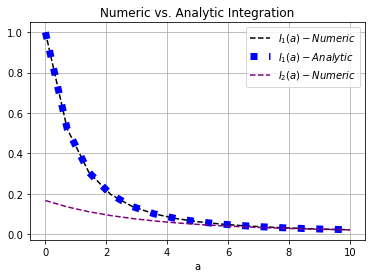

In [5]:
#Import libraries we need
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import nquad
from scipy.special import erf

#Define the function we want to integrate
#Integrating z -> y -> x, and 'a' is a parameter
def f(z, y, x, a):
    return np.exp(-a * (x**2 + y**2 + z**2))

#Defining our ranges for the integrals
range_x = [0, 1]
range_y = [0, 1]
range_z = [0, 1]

#Define integral
#The 'args' paramter expects a tuple, so even though we're passing in only 'a' the comma after it is necessary
def I_1scalar(a):
    return nquad(f, [range_z, range_y, range_x], args=(a,))

I_1scalar(0) #This gives back a tuple, the first is the value of the integral, the second is the relative error

#Define a function to take in an array of n parameters
I_1vector = np.vectorize(I_1scalar)

#The integral is proportional to the following error function
def ans(a):
    prop = (np.pi/(4 * a))**(3/2)
    return prop * erf(np.sqrt(a))**3

eps = 1.0e-6
avals = np.linspace(eps, 10, 15)


#Now we're going to work with integral ranges that are not constant
#Before z was going from 0 to 1, but now we'll define z as going from 0 to 1 - x - y
#For that we need to define z as a function of x and y and 'a' as such
def range_zz(y, x, a):
    return [0, 1 - x - y]

#Now we'll do something similar for y
def range_yy(x, a):
    return [0, 1 - x]

#For x nothing will change for this particular integral
range_xx = [0, 1]

#Defining integral in terms of new ranges
def I_2scalar(a):
    return nquad(f, [range_zz, range_yy, range_xx], args=(a,))

#Define a function to take in an array of n parameters
I_2vector = np.vectorize(I_2scalar)


#Plotting
plt.title('Numeric vs. Analytic Integration')
plt.plot(avals, I_1vector(avals)[0], label="$I_1(a) - Numeric$", linestyle="--", color="black")
plt.plot(avals, ans(avals), label="$I_1(a) - Analytic$", linestyle=":", color="blue", linewidth=7)
plt.plot(avals, I_2vector(avals)[0], label="$I_2(a) - Numeric$", linestyle="--", color="purple")
plt.legend()
plt.grid()
plt.xlabel('a')
plt.show()